## **1. Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
# Specify the path to your CSV file
csv_file_path = 'CBB_Listings.csv'

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(csv_file_path,on_bad_lines='skip')

df.head()

,listing_id,listing_heading,listing_type,listing_url,listing_first_date,days_on_market,dealer_id,dealer_name,dealer_street,dealer_city,...,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,price_history_delimited,distance_to_dealer,location_score,listing_dropoff_date
0,f5b663d2-4896-11ef-a15b-8b4423f1ff08,1987 IROC Z 350 Auto T-Tops,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/22/2024 0:00,9,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,...,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-22,11500,230860",9.84,5,NaN
1,a9f565e6-4712-11ef-a23f-79dc25c5e601,NaN,Sold,https://www.redlinemotors.ca/vehicle-details/1...,7/20/2024 0:00,4,11131329,Redlinemotors.Ca,14421 Mark Messier Trail,Edmonton,...,0.0,RWD,5.2L V8,A,Gas,0,"2024-07-20,8700,48905",8.30,5,7/24/2024 0:00
2,03d18c58-253a-11ef-8f33-8905b4a2f000,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,6/7/2024 0:00,54,11161704,Gateway Auto & Rv Sales & Financing Ltd,5404 Gateway Blvd NW,Edmonton,...,0.0,FWD,4.5L V8 DI,A,Gas,0,"2024-06-07,6000,174640",5.71,4,NaN
3,2d12630b-460e-11ee-89c4-e5b3161d4741,1989 Cadillac DeVille Sedan FWD,Active,https://www.sweetheartmotor.com/cars/used/1989...,8/28/2023 0:00,338,11128265,Credit Angels,5404 Gateway Blvd NW,Edmonton,...,0.0,FWD,4.5L V8 DI,A,Gas,4,"2023-08-28,4500,174640:2023-09-13,5900,174640:...",5.71,5,NaN
4,53a8e550-47cd-11ef-8587-f926ecb61035,1989 Camaro IROC 350 Auto T-Top,Active,https://www.kijiji.ca/v-cars-trucks/edmonton/1...,7/21/2024 0:00,10,11152931,David T's Camaro & Firebird Auto Center,10611 201 St NW,Edmonton,...,0.0,RWD,5.7L V8 TBI,A,Gas,0,"2024-07-21,8500,288000",9.84,5,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               145114 non-null  object 
 1   listing_heading          141099 non-null  object 
 2   listing_type             145114 non-null  object 
 3   listing_url              145114 non-null  object 
 4   listing_first_date       145114 non-null  object 
 5   days_on_market           145114 non-null  int64  
 6   dealer_id                145114 non-null  int64  
 7   dealer_name              145114 non-null  object 
 8   dealer_street            145114 non-null  object 
 9   dealer_city              145114 non-null  object 
 10  dealer_province          145114 non-null  object 
 11  dealer_postal_code       145114 non-null  object 
 12  dealer_url               145114 non-null  object 
 13  dealer_email             0 non-null       float64
 14  deal

In [4]:
#Droping columns
df = df.drop(['dealer_email', 'dealer_phone', 'has_leather', 'has_navigation'], axis=1)

In [5]:
df.isnull().sum()

,0
listing_id,0
listing_heading,4015
listing_type,0
listing_url,0
listing_first_date,0
days_on_market,0
dealer_id,0
dealer_name,0
dealer_street,0
dealer_city,0


In [6]:
# Convert 'listing_first_date' to datetime
df['listing_first_date'] = pd.to_datetime(df['listing_first_date'])

# Calculate 'listing_dropoff_date' using days_on_market columns
df['listing_dropoff_date'] = df['listing_first_date'] + pd.to_timedelta(df['days_on_market'], unit='D')

#updating ''listing_dropoff_date' to datetime
df['listing_dropoff_date'] = pd.to_datetime(df['listing_dropoff_date'])

# Display the updated DataFrame
df[['listing_first_date', 'days_on_market', 'listing_dropoff_date']].head()

,listing_first_date,days_on_market,listing_dropoff_date
0,2024-07-22,9,2024-07-31
1,2024-07-20,4,2024-07-24
2,2024-06-07,54,2024-07-31
3,2023-08-28,338,2024-07-31
4,2024-07-21,10,2024-07-31


In [7]:
#Calculating the number of 0s in 'price' column
num_zeros = (df['price'] == 0).sum()
print(f"Number of 0s in 'price' column: {num_zeros}")\

#calculating the median of the 'price' column excluding 0s
median_price = df[df['price'] != 0]['price'].median()

#filling the 0s with the median
df.loc[df['price'] == 0, 'price'] = median_price

#Displaying price
df['price']

Number of 0s in 'price' column: 4340


,price
0,11500
1,8700
2,6000
3,6000
4,8500
...,...
145109,105781
145110,105990
145111,108201
145112,108201


In [8]:
df.isnull().sum()

,0
listing_id,0
listing_heading,4015
listing_type,0
listing_url,0
listing_first_date,0
days_on_market,0
dealer_id,0
dealer_name,0
dealer_street,0
dealer_city,0


In [9]:
# Replace the nulls in series, exterior_color, exterior_color_category, interior_color, interior_color_category with mode
df['series'].fillna(df['series'].mode()[0])
df['exterior_color'].fillna(df['exterior_color'].mode()[0])
df['exterior_color_category'].fillna(df['exterior_color_category'].mode()[0])
df['interior_color'].fillna(df['interior_color'].mode()[0])
df['interior_color_category'] = df['interior_color_category'].fillna(df['interior_color_category'].mode()[0])

In [10]:
# Replacing numerical values in Certified column with categorical ones
df['certified'] = df['certified'].replace({0: 'No', 1: 'Yes'})
df['certified']

,certified
0,No
1,No
2,No
3,No
4,No
...,...
145109,No
145110,No
145111,No
145112,No


In [11]:
#Replace 0s with NaN
df['wheelbase_from_vin'] = df['wheelbase_from_vin'].replace(0, np.nan)

#imputaion with median:
df['wheelbase_from_vin'] = df['wheelbase_from_vin'].fillna(df['wheelbase_from_vin'].median())

df['wheelbase_from_vin']

,wheelbase_from_vin
0,2850.0
1,2850.0
2,2850.0
3,2850.0
4,2850.0
...,...
145109,2984.5
145110,2984.5
145111,2984.5
145112,2984.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   listing_id               145114 non-null  object        
 1   listing_heading          141099 non-null  object        
 2   listing_type             145114 non-null  object        
 3   listing_url              145114 non-null  object        
 4   listing_first_date       145114 non-null  datetime64[ns]
 5   days_on_market           145114 non-null  int64         
 6   dealer_id                145114 non-null  int64         
 7   dealer_name              145114 non-null  object        
 8   dealer_street            145114 non-null  object        
 9   dealer_city              145114 non-null  object        
 10  dealer_province          145114 non-null  object        
 11  dealer_postal_code       145114 non-null  object        
 12  dealer_url      

In [13]:
#Categorical features from data for table and bar charts
categorical_features = ['series', 'exterior_color', 'exterior_color_category',
                        'interior_color', 'interior_color_category',
                        'drivetrain_from_vin', 'transmission_from_vin',
                        'fuel_type_from_vin', 'engine_from_vin', 'make', 'stock_type']

for feature in categorical_features:
  print(f"Frequency Table for {feature}:\n")
  print(df[feature].value_counts())
  print("\n" + '-'*30 +  "\n")

Frequency Table for series:

series
XLT                     4800
Sport                   4716
Limited                 3907
LT                      3025
Denali                  2970
                        ... 
T8 - Polestar              1
DLX                        1
Iroc Z28                   1
Sierra SL                  1
Recharge Ultimate 6P       1
Name: count, Length: 1630, dtype: int64

------------------------------

Frequency Table for exterior_color:

exterior_color
Black              20078
White              19933
Other              12062
Grey               10183
Blue                7118
                   ...  
SILVER METALLIC        1
ACC-T                  1
KINGFISHER BLUE        1
DEEP BLACK             1
DEEP BLACK PEA;        1
Name: count, Length: 3299, dtype: int64

------------------------------

Frequency Table for exterior_color_category:

exterior_color_category
white                   33418
black                   32965
blue                    11657
gray        

In [14]:
unique_postal_code = df['dealer_postal_code'].unique()
print(f"Number of unique values: {len(unique_postal_code)}")

Number of unique values: 185


In [15]:
import geopy
import pandas as pd
from geopy.extra.rate_limiter import RateLimiter # to avoid overloading the server
from functools import lru_cache #used to cache the results

In [17]:
postal_codes = pd.read_csv('POSTAL_CODE.csv')  # LOad POSTAL code FILE
print(postal_codes.head())

  dealer_postal_code    Latitude   Longitude
0             T5S 1Y8  53.549233 -113.666536
1             T6V 1H4  53.604536 -113.578942
2             T6H 1B7  53.492482 -113.493143
3             T6X 1A1  53.421713 -113.489730
4             T8N 7X1  53.674928 -113.638065


In [19]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR method to key numerical columns
columns_to_check = ['price', 'mileage', 'msrp', 'wheelbase_from_vin', 'location_score']
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)


Outliers detected:
                                  listing_id  \
10801   80cc5578-27a0-11ef-a680-3d84711e35ea   
17833   dde44645-f480-11ee-8848-b13046f401d9   
27380   a3187960-ce41-48c4-a9db-720463dcdd6e   
28031   eaea271f-13ef-11ef-bb3c-2d326284c924   
31374   1e186c97-34fa-11ef-83f0-b969cdaa9075   
...                                      ...   
145106  53f572e7-fa01-11ee-b075-49dc56fc727e   
145107  8c1c7f88-db92-11ee-ab06-530f070cc8e4   
145108  8c4738bc-db92-11ee-a998-470931fd0ee5   
145109  8c4d2cd4-db92-11ee-ab06-77676d6b474c   
145110  8b564927-db92-11ee-8456-d37a8da2f6cb   

                                          listing_heading listing_type  \
10801   2016 Chevrolet Corvette Z06 3LZ | Low KM | 7-S...         Sold   
17833                                2017 Kia Sportage LX         Sold   
27380   Used 2019 Chevrolet Corvette Coupe Z06 3LZ Aut...       Active   
28031   2019 Dodge Challenger SRT Hellcat | Remote Sta...         Sold   
31374                2019 Jeep Wra

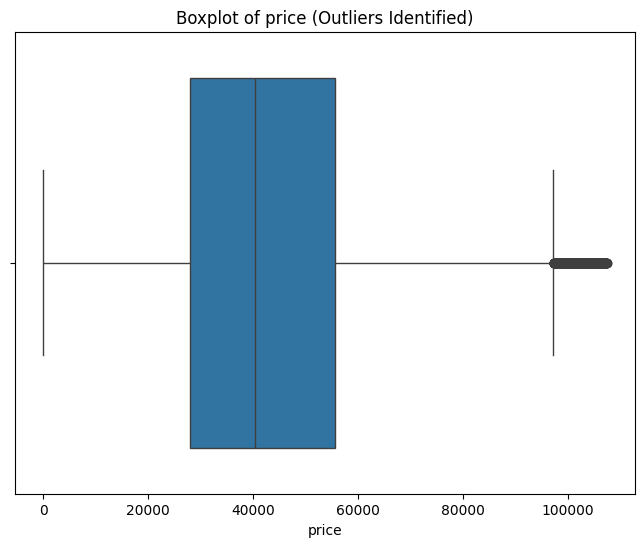

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Choose a specific column to check for outliers (e.g., 'price')
column = 'price'

# Calculate IQR and identify outliers
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Print outliers information
print("Outliers detected:")
print(outliers)

# Visualize the boxplot for the column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column])
plt.title(f'Boxplot of {column} (Outliers Identified)')
plt.show()


Outliers detected:
                                  listing_id  \
3       2d12630b-460e-11ee-89c4-e5b3161d4741   
7       60d309fb-58f1-11ee-a71d-d56f38d3c5a9   
48      faae7544-49fb-11ee-a5f8-8dc7c45c1299   
92      84144e2d-cbe0-11ee-974d-c1b82c84d694   
357     60df70dc-8755-11ee-b323-c900c929992e   
...                                      ...   
144805  c57f4e0d-98ae-11ee-8a1b-0d4de3a9ffe3   
144806  4e6139ee-b536-11ee-bb04-a504ac6f871c   
144817  2f3077dd-91a9-11ee-8510-9d21d703ad32   
144818  620ca1fc-a7b8-11ee-b32b-8d1c819b776f   
144819  26c115fd-b167-11ee-8736-ab19fc2ecf29   

                                          listing_heading listing_type  \
3                         1989 Cadillac DeVille Sedan FWD       Active   
7                                   1990 Mazda MX-5 Miata       Active   
48      1998 Mercedes-Benz SLK Kompressor Hard Top con...         Sold   
92      2001 Ford Mustang 2dr Convertible GT V8 | LOW ...         Sold   
357                             20

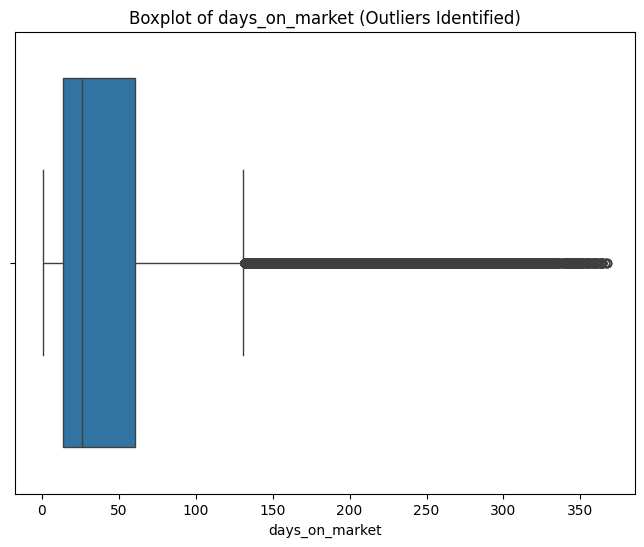

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Choose a specific column to check for outliers (e.g., 'price')
column = 'days_on_market'

# Calculate IQR and identify outliers
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Print outliers information
print("Outliers detected:")
print(outliers)

# Visualize the boxplot for the column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df[column])
plt.title(f'Boxplot of {column} (Outliers Identified)')
plt.show()


Z-scores:
                             listing_id  days_on_market   z_score
1  a9f565e6-4712-11ef-a23f-79dc25c5e601               4 -0.755492
2  03d18c58-253a-11ef-8f33-8905b4a2f000              54  0.097172
3  2d12630b-460e-11ee-89c4-e5b3161d4741             338  4.940306
6  4e9e38f4-2927-11ef-b663-8f640adf7e4f              49  0.011906
7  60d309fb-58f1-11ee-a71d-d56f38d3c5a9             314  4.531027

Outliers:
                                  listing_id  days_on_market   z_score
3       2d12630b-460e-11ee-89c4-e5b3161d4741             338  4.940306
7       60d309fb-58f1-11ee-a71d-d56f38d3c5a9             314  4.531027
48      faae7544-49fb-11ee-a5f8-8dc7c45c1299             275  3.865949
357     60df70dc-8755-11ee-b323-c900c929992e             250  3.439617
876     3d9ce4e1-5377-11ee-ae26-7b67cb481ddf             230  3.098551
...                                      ...             ...       ...
144578  39db4f66-64bb-11ee-adb9-bfe66c99693e             242  3.303191
144579  28c0b4e

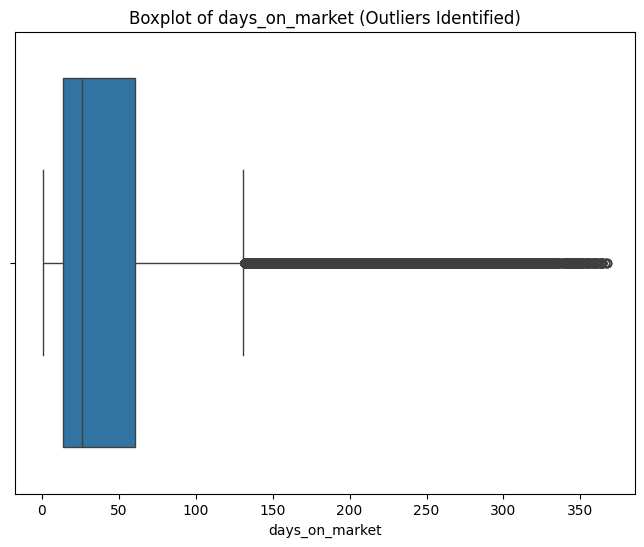

In [22]:
#finding the outliers using z score on column days on market
from scipy import stats
import numpy as np
#calculating the mean and standard deviation for the column days on market
mean = np.mean(df['days_on_market'])
std_dev = np.std(df['days_on_market'])

#calculating the z score for days on market
df['z_score'] = (df['days_on_market'] - mean) / std_dev
threshold = 3
outliers = df[df['z_score'].abs() > threshold]
print(f"Z-scores:\n{df[['listing_id', 'days_on_market', 'z_score']].head()}")
print(f"\nOutliers:\n{outliers[['listing_id', 'days_on_market', 'z_score']]}")
#PLOTTING THE Boxplot for z score and outlier
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['days_on_market'])
plt.title(f'Boxplot of days_on_market (Outliers Identified)')
plt.show()



In [23]:
# Save the clean df
clean_df_path = 'clean_df.csv'
df.to_csv(clean_df_path, index=False)